test tra i vari algoritmi di preprocess

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path_image_giorno = "..\\test\provaGiorno.png"
path_image_notte = "..\\test\provaNotte.png"
image_giorno = cv2.imread(path_image_notte)
image_notte = cv2.imread(path_image_notte)

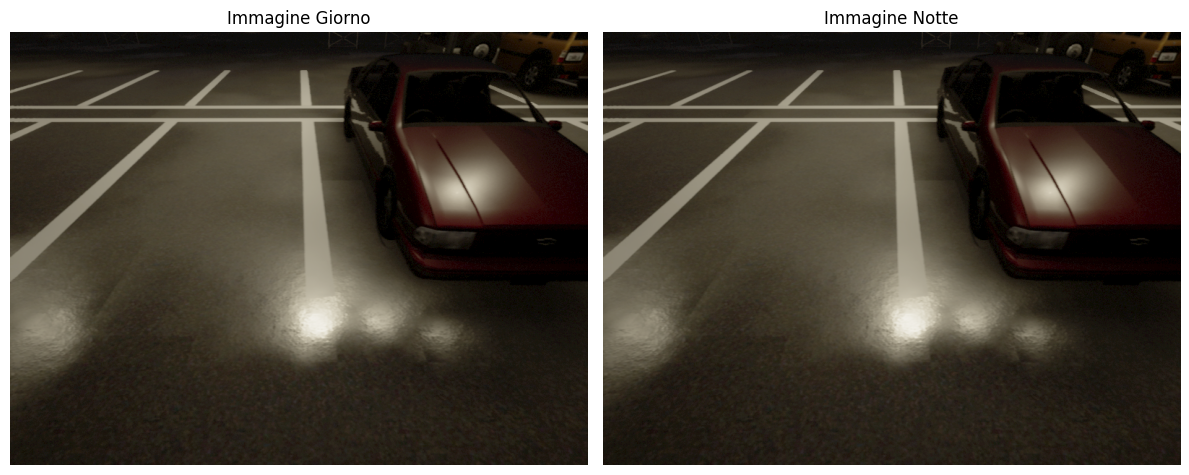

In [14]:
if image_giorno is None or image_notte is None:
    print("Errore nel caricamento delle immagini. Controlla i percorsi.")
else:
    # Configura il layout per mostrare le immagini
    plt.figure(figsize=(12, 6))

    # Immagine Giorno
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_giorno, cv2.COLOR_BGR2RGB))
    plt.title("Immagine Giorno")
    plt.axis("off")

    # Immagine Notte
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_notte, cv2.COLOR_BGR2RGB))
    plt.title("Immagine Notte")
    plt.axis("off")

    # Mostra le immagini
    plt.tight_layout()
    plt.show()

preprocess soglia globale

In [15]:
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    return mask_cleaned

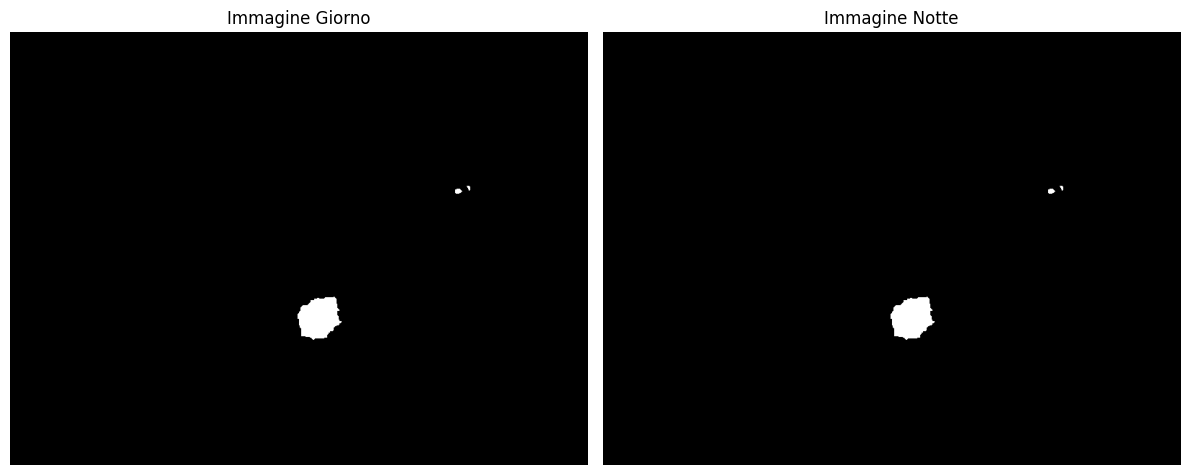

In [16]:
image_giornop = preprocess_image(image_giorno)
image_nottep = preprocess_image(image_notte)

if image_giornop is None or image_nottep is None:
    print("Errore nel caricamento delle immagini. Controlla i percorsi.")
else:
    # Configura il layout per mostrare le immagini
    plt.figure(figsize=(12, 6))

    # Immagine Giorno
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_giornop, cv2.COLOR_GRAY2RGB))
    plt.title("Immagine Giorno")
    plt.axis("off")

    # Immagine Notte
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_nottep, cv2.COLOR_GRAY2RGB))
    plt.title("Immagine Notte")
    plt.axis("off")

    # Mostra le immagini
    plt.tight_layout()
    plt.show()

preprocess con maschera in HSV

In [21]:
def preprocess_image(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 50, 255])
    binary_mask = cv2.inRange(hsv_image, lower_white, upper_white)
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    return mask_cleaned

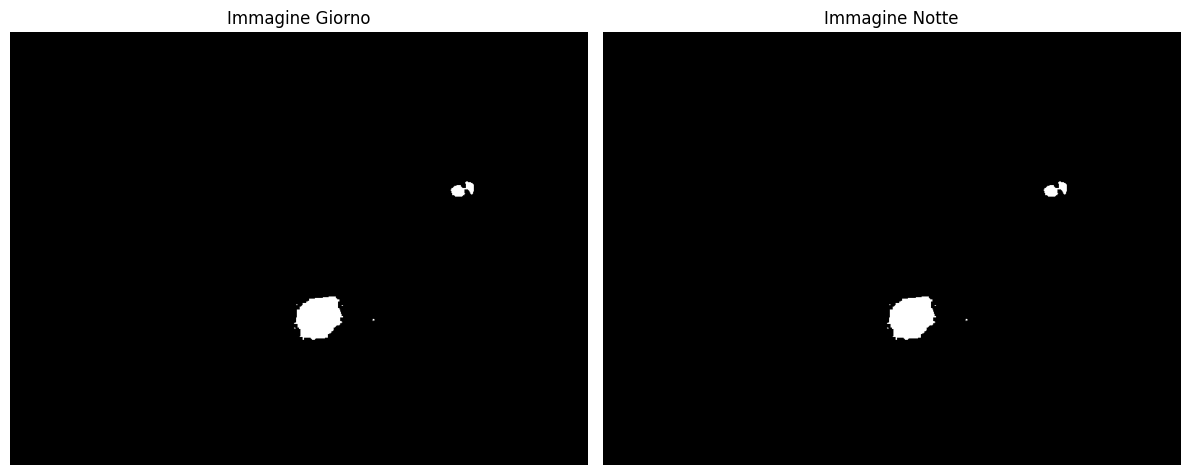

In [22]:
image_giornop = preprocess_image(image_giorno)
image_nottep = preprocess_image(image_notte)

if image_giornop is None or image_nottep is None:
    print("Errore nel caricamento delle immagini. Controlla i percorsi.")
else:
    # Configura il layout per mostrare le immagini
    plt.figure(figsize=(12, 6))

    # Immagine Giorno
    plt.subplot(1, 2, 1)
    plt.imshow(image_giornop, cmap="gray")
    plt.title("Immagine Giorno")
    plt.axis("off")

    # Immagine Notte
    plt.subplot(1, 2, 2)
    plt.imshow(image_nottep, cmap="gray")
    plt.title("Immagine Notte")
    plt.axis("off")

    # Mostra le immagini
    plt.tight_layout()
    plt.show()

preprocess con soglia locale

In [23]:
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)
    kernel = np.ones((3, 13), np.uint8)
    opened_mask = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(opened_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    final_mask = np.zeros_like(opened_mask)
    for contour in contours:
        if cv2.contourArea(contour) >= 1500:
            cv2.drawContours(final_mask, [contour], -1, (255), thickness=cv2.FILLED)
    return final_mask

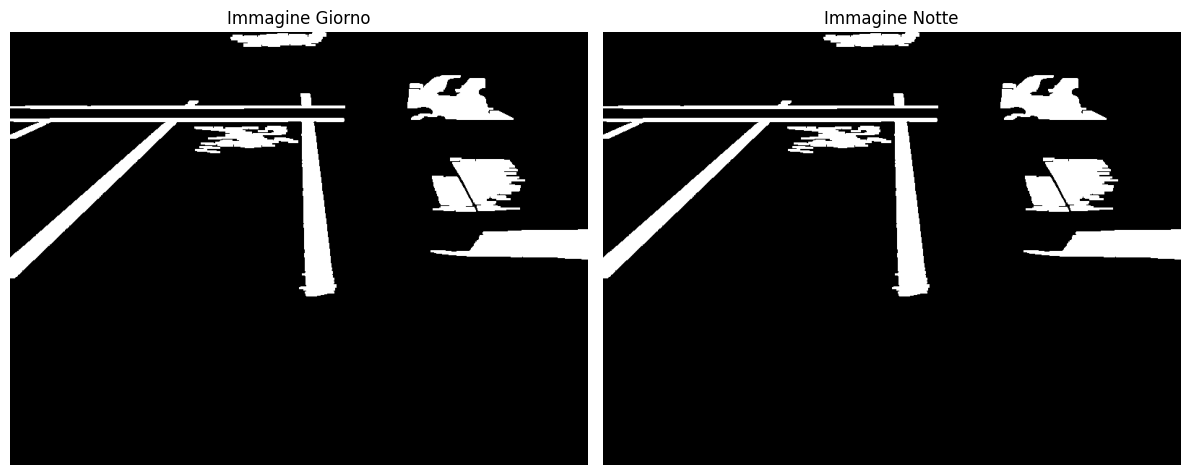

In [24]:
image_giornop = preprocess_image(image_giorno)
image_nottep = preprocess_image(image_notte)

if image_giornop is None or image_nottep is None:
    print("Errore nel caricamento delle immagini. Controlla i percorsi.")
else:
    # Configura il layout per mostrare le immagini
    plt.figure(figsize=(12, 6))

    # Immagine Giorno
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_giornop, cv2.COLOR_GRAY2RGB))
    plt.title("Immagine Giorno")
    plt.axis("off")

    # Immagine Notte
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_nottep, cv2.COLOR_GRAY2RGB))
    plt.title("Immagine Notte")
    plt.axis("off")

    # Mostra le immagini
    plt.tight_layout()
    plt.show()